## Cargar los datos

Se deben poner todos los descriptores al mismo nivel que todos los archivos de la tarea, en la carpeta `descriptores`

In [1]:
from Data import load_dataset_pair

(queryset1, dataset1) = load_dataset_pair("descriptores/MEL128", 21573, 33545, 128)
print("Q1={} R1={}".format(queryset1.shape, dataset1.shape))

(queryset2, dataset2) = load_dataset_pair("descriptores/SIFT", 2886, 202088, 128)
print("Q2={} R2={}".format(queryset2.shape, dataset2.shape))

(queryset3, dataset3) = load_dataset_pair("descriptores/VGG19", 842, 10171, 4096)
print("Q3={} R3={}".format(queryset3.shape, dataset3.shape))

datasets = [(queryset1, dataset1), (queryset2, dataset2), (queryset3, dataset3)]


Q1=(21573, 128) R1=(33545, 128)
Q2=(2886, 128) R2=(202088, 128)
Q3=(842, 4096) R3=(10171, 4096)


## Calcular Dimensión Intrínseca de los Conjuntos

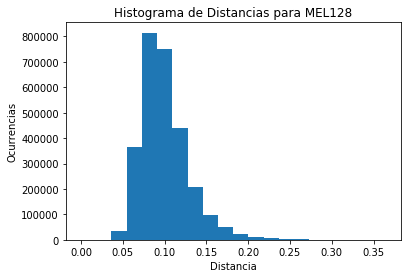

Dimensión Intrínseca MEL128 = 6.005606210118496


In [ ]:
from Data import dimension_intrinseca

d1 = dimension_intrinseca(dataset1, titulo='Histograma de Distancias para MEL128', porc_muestras=0.05)
print(f'Dimensión Intrínseca MEL128 = {d1}')

d2 = dimension_intrinseca(dataset2, titulo='Histograma de Distancias para SIFT', porc_muestras=0.02)
print(f'Dimensión Intrínseca SIFT = {d2}')

d3 = dimension_intrinseca(dataset3, titulo='Histograma de Distancias para VGG19', porc_muestras=0.2)
print(f'Dimensión Intrínseca VGG19 = {d3}')

## Medir desempeño de los índices
Se construyen los índices y se prueban distintos parámetros para cada uno, se almacenan los resultados en arreglos por índice.

In [3]:
from Index import Linear, KDTree, KMeansTree
from Results import obtener_curva

num_datasets = len(datasets)
curvas_kdtree = [[] for _ in range(num_datasets)]
leyenda_kdtree = [[] for _ in range(num_datasets)]
curvas_kmeans = [[] for _ in range(num_datasets)]
leyenda_kmeans = [[] for _ in range(num_datasets)]

for i in range(num_datasets):

    print(f'Usando dataset {i + 1}')
    dataset, queryset = datasets[i]
    # construir el indice linear scan y buscar los NN
    linear = Linear(dataset)
    print("construccion linear scan = {:.1f}".format(linear.build_time))
    lscan_dists, lscan_time = linear.search(queryset)
    print("busqueda linear scan = {:.1f}\n".format(lscan_time))

    # obtener curvas para KD-Tree

    # número de árboles a probar
    num_trees = [5, 10, 20, 30, 40, 60]
    for trees in num_trees:

        # construir el indice KD-Tree
        kdtree = KDTree(dataset, trees=trees)
        print('construccion {:d}-KDTree = {:.1f}'.format(trees, kdtree.build_time))

        # obtener curva y agregar al arreglo
        efectividad, eficiencia = obtener_curva(kdtree, queryset, lscan_time, lscan_dists)
        curvas_kdtree[i].append([efectividad, eficiencia])
        leyenda_kdtree[i].append('{:d} árboles'.format(trees))
        print('{:d} busquedas {:d}-KDTree = {:.1f}\n'.format(len(eficiencia) - 1, trees, sum(eficiencia) * lscan_time))


    # número de ramas a probar
    num_branches = [5, 10, 20, 30, 40, 50]
    for branches in num_branches:

        # construir el indice K-Means Tree
        kmeanstree = KMeansTree(dataset, branching=branches)
        print('construccion {:d}-KMeansTree = {:.1f}'.format(branches, kmeanstree.build_time))

        # obtener curva y agregar al arreglo
        efectividad, eficiencia = obtener_curva(kmeanstree, queryset, lscan_time, lscan_dists)
        curvas_kmeans[i].append([efectividad, eficiencia])
        leyenda_kmeans[i].append('{:d} ramas'.format(branches))
        print('{:d} busquedas {:d}-KMeansTree = {:.1f}\n'.format(len(eficiencia) - 1, branches, sum(eficiencia) * lscan_time))
    
    print('----------------------------\n')


Usando dataset 1
construccion linear scan = 0.0
busqueda linear scan = 50.8
construccion 5-KDTree = 0.3
Punto1 = 6.8%, 0.0% (0.1s)
Punto2 = 11.6%, 0.0T (0.1s)
Punto3 = 18.6%, 0.0T (0.2s)
Punto4 = 26.1%, 0.0T (0.2s)
Punto5 = 34.6%, 0.0T (0.3s)
Punto6 = 44.7%, 0.0T (0.5s)
Punto7 = 55.8%, 0.0T (0.9s)
Punto8 = 67.5%, 0.0T (1.6s)
Punto9 = 78.7%, 0.1T (3.5s)
Punto10 = 87.9%, 0.1T (6.5s)
Punto11 = 94.5%, 0.3T (13.8s)
Punto12 = 98.1%, 0.5T (25.6s)
Punto13 = 99.6%, 1.1T (58.3s)
Punto14 = 100.0%, 2.5T (124.6s)
13 busquedas 5-KDTree = 236.3
construccion 10-KDTree = 0.6
Punto1 = 6.8%, 0.0% (0.3s)
Punto2 = 11.5%, 0.0T (0.2s)
Punto3 = 18.4%, 0.0T (0.2s)
Punto4 = 27.5%, 0.0T (0.3s)
Punto5 = 37.1%, 0.0T (0.4s)
Punto6 = 47.6%, 0.0T (0.6s)
Punto7 = 59.7%, 0.0T (1.1s)
Punto8 = 71.7%, 0.0T (2.5s)
Punto9 = 82.6%, 0.1T (3.5s)
Punto10 = 91.0%, 0.1T (7.0s)
Punto11 = 96.3%, 0.3T (14.3s)
Punto12 = 98.8%, 0.6T (31.9s)
Punto13 = 99.8%, 1.3T (65.5s)
Punto14 = 100.0%, 3.1T (156.9s)
13 busquedas 10-KDTree = 284.7
co

Punto10 = 100.0%, 0.8T (31.2s)
9 busquedas 10-KMeansTree = 70.2
construccion 20-KMeansTree = 0.2
Punto1 = 45.7%, 0.0% (1.2s)
Punto2 = 46.9%, 0.0T (1.3s)
Punto3 = 48.3%, 0.0T (1.3s)
Punto4 = 52.1%, 0.0T (1.4s)
Punto5 = 61.6%, 0.0T (1.7s)
Punto6 = 74.1%, 0.1T (2.3s)
Punto7 = 87.0%, 0.1T (3.3s)
Punto8 = 95.4%, 0.1T (5.2s)
Punto9 = 98.9%, 0.2T (9.2s)
Punto10 = 99.8%, 0.4T (16.6s)
Punto11 = 100.0%, 0.8T (30.0s)
10 busquedas 20-KMeansTree = 73.5
construccion 30-KMeansTree = 0.4
Punto1 = 48.9%, 0.0% (1.5s)
Punto2 = 49.3%, 0.0T (1.4s)
Punto3 = 52.0%, 0.0T (1.5s)
Punto4 = 59.3%, 0.0T (1.7s)
Punto5 = 72.2%, 0.1T (2.1s)
Punto6 = 84.2%, 0.1T (2.9s)
Punto7 = 93.7%, 0.1T (4.1s)
Punto8 = 98.2%, 0.2T (6.6s)
Punto9 = 99.6%, 3.3T (130.3s)
Punto10 = 100.0%, 0.6T (22.2s)
9 busquedas 30-KMeansTree = 174.2
construccion 40-KMeansTree = 0.5
Punto1 = 50.4%, 0.0% (1.7s)
Punto2 = 52.6%, 0.0T (1.8s)
Punto3 = 60.2%, 0.1T (2.1s)
Punto4 = 73.2%, 0.1T (2.7s)
Punto5 = 84.9%, 0.1T (3.8s)
Punto6 = 93.3%, 0.1T (5.3s)
Pun

## Graficar y Tabular los resultados

Hacer doble click sobre la imagen para ver en definición completa


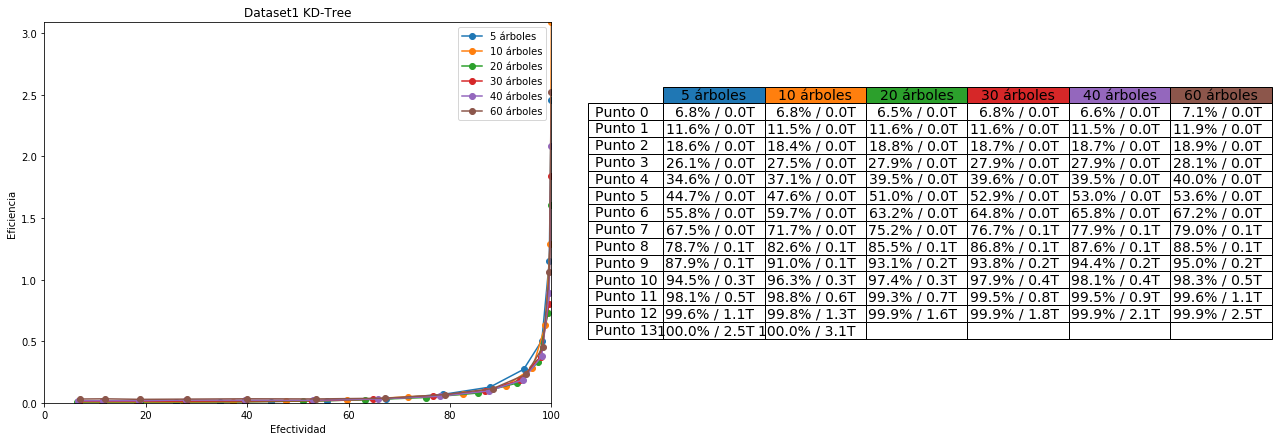

Hacer doble click sobre la imagen para ver en definición completa


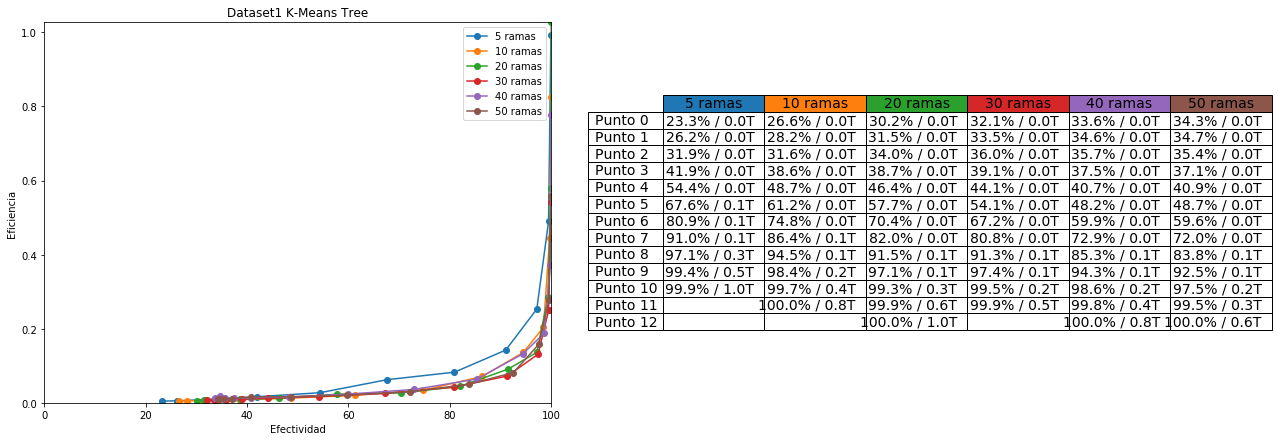

Hacer doble click sobre la imagen para ver en definición completa


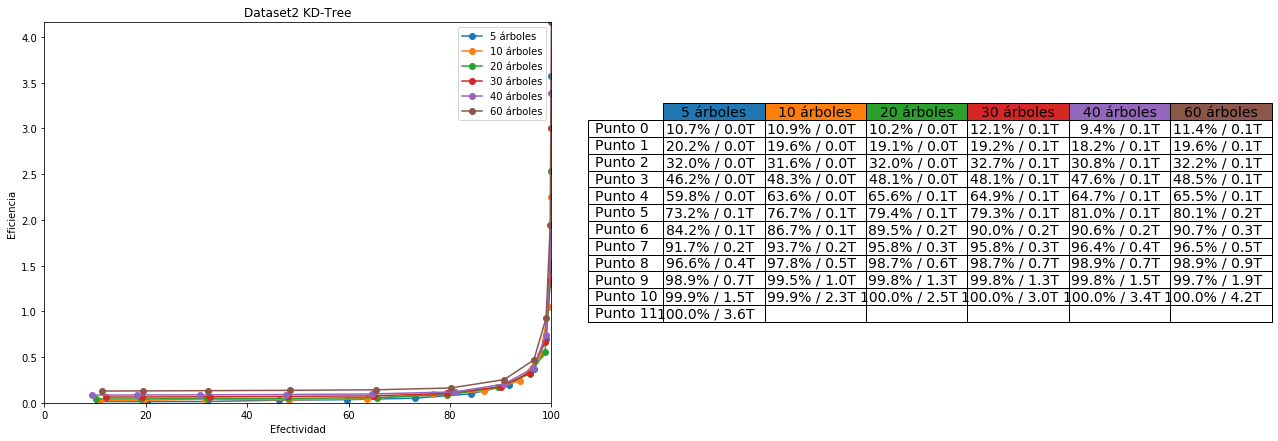

Hacer doble click sobre la imagen para ver en definición completa


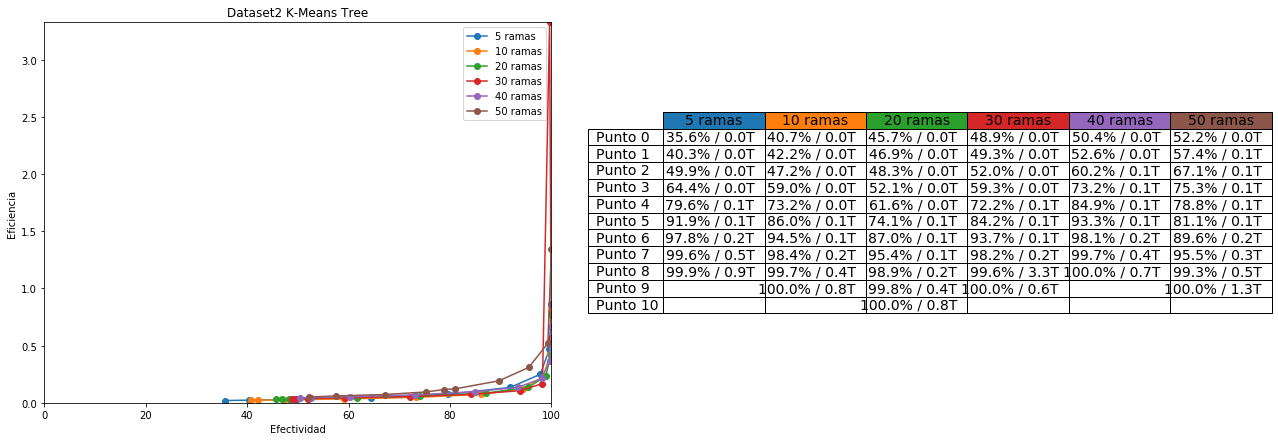

Hacer doble click sobre la imagen para ver en definición completa


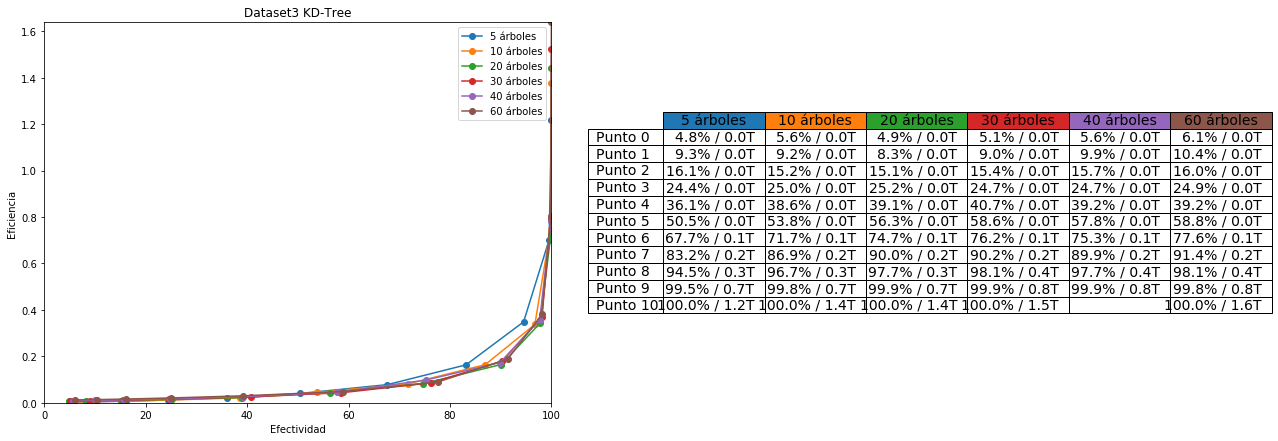

Hacer doble click sobre la imagen para ver en definición completa


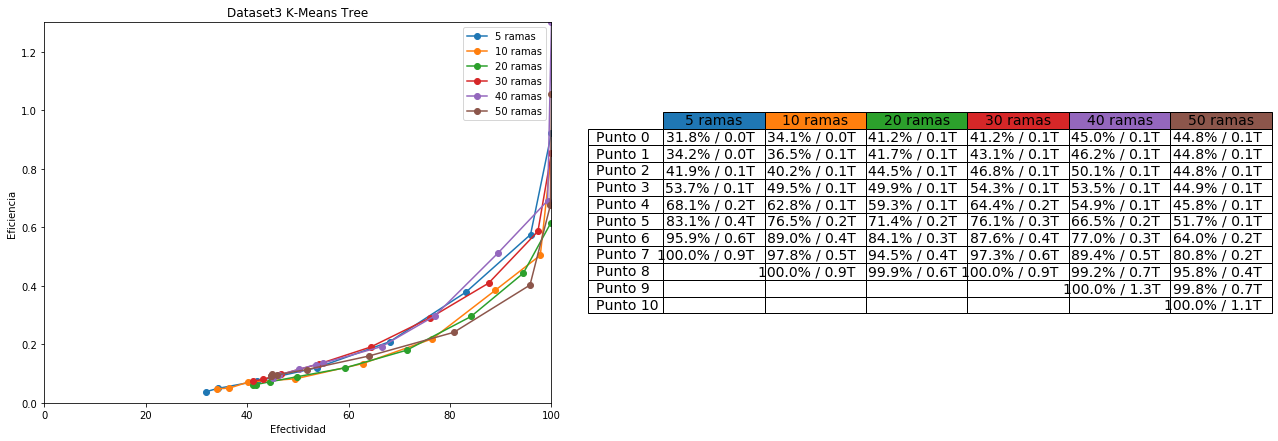

In [17]:
from Results import graficar_curvas

# graficar los datos
graficar_curvas(curvas_kdtree[0], leyenda_kdtree[0], "KD-Tree en MEL128")
graficar_curvas(curvas_kmeans[0], leyenda_kmeans[0], "K-Means Tree en MEL128")

graficar_curvas(curvas_kdtree[1], leyenda_kdtree[1], "KD-Tree en SIFT")
graficar_curvas(curvas_kmeans[1], leyenda_kmeans[1], "K-Means Tree en SIFT")

graficar_curvas(curvas_kdtree[2], leyenda_kdtree[2], "KD-Tree en VGG19")
graficar_curvas(curvas_kmeans[2], leyenda_kmeans[2], "K-Means Tree en VGG19")